# Predicting Severity of Impact from Conflict Events in Kenya

## Group_3: Capstone Project

### Authors:
    Endalkachew Dessalegne
    James Gatonye
    Danton Kipngen
    Noel Seda
    Zeena Karariu
   

## 1. Project Overview

## 1.1. Business Understanding 
### 1.1.1 Business Problem 


In recent years, Kenya has experienced frequent demonstrations driven by political, social, and economic factors. These events often escalate rapidly and impact surrounding communities in varying degrees-from minimal disruption to full-blown humanitarian emergencies. Currently, decision-makers such as government agencies, humanitarian organizations, and peacekeeping forces lack effective real-time tools to predict how severe the consequences of such events might be. Without timely insight into the potential impact, it becomes difficult to coordinate an appropriate and rapid response.
This project aims to build a predictive model that assesses the severity level of conflict events-categorized as low, moderate, high, or critical-to help stakeholders allocate emergency resources proportionally and respond faster to unfolding crises.

### 1.1.2. Objectives

The primary objective of this project is to build a predictive model that classifies conflict events in Kenya into four severity levels—Low, Moderate, High, and Critical—based on historical data from the Armed Conflict Location & Event Data Project (ACLED).

This model will aid stakeholders such as humanitarian agencies, emergency responders, government bodies, and peacebuilding organizations to:

- Predict the likely severity of emerging or recent conflict events using structured event data.

- Prioritize response efforts to areas or events that are likely to have a higher community impact.

- Inform proactive planning and policy-making using insights from past trends and geospatial patterns of conflict severity.

- Allocate limited emergency and humanitarian resources more efficiently by understanding the spatial and temporal distribution of severe conflict events.

#### Specific Project Goals
- Engineer a Community Impact Score (CIS) from historical ACLED data using variables such as fatalities, event type, civilian targeting, and narrative descriptions.

- Map the CIS to a categorical severity label: Low, Moderate, High, or Critical.

- Train and evaluate multiple multi-class classification models using both numerical and categorical event features.

- Visualize and interpret feature importance to understand the key drivers of conflict severity.

## 2. Data Understanding

This project uses data from the Armed Conflict Location & Event Data Project (ACLED), which provides detailed records of conflict-related events across Africa. The raw dataset includes over 431,000 records spanning from 1997 to 2025, with events reported in multiple countries. Since the project focuses on understanding and predicting conflict severity within Kenya, we extract and analyze only events that occurred in Kenya.

### 2.1. Data Source
- Dataset: ACLED Africa Curated Data

- Time Period: 1997–2025

- Geographic Scope: Africa

- Download Source: https://acleddata.com/

- Format: CSV

- Size: ~431.2 K rows × 31 columns


### 2.2. Load Dataset

In [1]:
# import pandas 
import pandas as pd

# Load Africa dataset
df = pd.read_csv("Africa_1997-2025_Jun27.csv")

# View shape and sample rows
print (f"Number of rows: {df.shape[0]}")
print (f"Number of columns: {df.shape[1]}")
df.head()


Number of rows: 431277
Number of columns: 31


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,ANG4195,2025-06-27,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Angola),MEA: Movement of Angolan Students; Students (A...,Protesters,...,Luanda,-8.8383,13.2344,1,24 Horas; A Semana,National-International,"On 27 June 2025, students supported by the Mov...",0,crowd size=no report,1751322203
1,BFO14070,2025-06-27,2025,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Vaongo,11.1761,-0.0850,1,Signal,New media,"On 27 June 2025, an armed group (likely JNIM m...",0,NaN,1751322204
2,BFO14071,2025-06-27,2025,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Diabo,12.0166,-0.0333,1,Signal,New media,"On 27 June 2025, JNIM militants ambushed a pat...",10,NaN,1751322204
3,BFO14072,2025-06-27,2025,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Anago,11.1876,-0.1063,1,Signal,New media,"On 27 June 2025, an armed group (likely JNIM m...",0,NaN,1751322204
4,BFO14073,2025-06-27,2025,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Namssiguia,13.8317,-1.6082,2,Al Zallaqa,New media,"On 27 June 2025, JNIM claimed to have targeted...",0,NaN,1751322204


In [2]:
# Check the number and list of countries included
df['country'].nunique(), df['country'].unique() 

(58,
 array(['Angola', 'Burkina Faso', 'Cameroon', 'Cape Verde',
        'Democratic Republic of Congo', 'Libya', 'Mauritania', 'Mali',
        'Morocco', 'Mauritius', 'Mozambique', 'Nigeria', 'South Africa',
        'Somalia', 'Sudan', 'Tunisia', 'Ethiopia', 'Ghana', 'Malawi',
        'South Sudan', 'Togo', 'Uganda', 'Kenya', 'Niger', 'Senegal',
        'eSwatini', 'Egypt', 'Guinea-Bissau', 'Namibia', 'Benin',
        'Ivory Coast', 'Guinea', 'Reunion', 'Central African Republic',
        'Tanzania', 'Chad', 'Liberia', 'Madagascar', 'Rwanda', 'Eritrea',
        'Algeria', 'Burundi', 'Lesotho', 'Zambia', 'Zimbabwe', 'Mayotte',
        'Comoros', 'Botswana', 'Republic of Congo', 'Gabon', 'Gambia',
        'Sao Tome and Principe', 'Sierra Leone',
        'British Indian Ocean Territory', 'Djibouti', 'Seychelles',
        'Equatorial Guinea',
        'Saint Helena, Ascension and Tristan da Cunha'], dtype=object))

#### 2.3. Filtering Kenya Data

In [3]:
# Creating dataset for Kenya conflict events 
df_kenya = df[df["country"] == "Kenya"].copy()

# Confirming shape and preview
#shape of df_kenya - number of rows and columns
print (f"Number of rows: {df_kenya.shape[0]}")
print (f"Number of columns: {df_kenya.shape[1]}") 
df_kenya.head()

Number of rows: 17812
Number of columns: 31


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
176,KEN18284,2025-06-25,2025,1,Strategic developments,Strategic developments,Change to group/activity,Police Forces of Kenya (2022-),NaN,State forces,...,Nairobi - Starehe,-1.2881,36.8236,1,Citizen (Kenya); Daily Nation (Kenya); Ghetto ...,New media-Subnational,"Security measures: On 25 June 2025, police off...",0,NaN,1751322259
177,KEN18288,2025-06-25,2025,1,Strategic developments,Strategic developments,Change to group/activity,Police Forces of Kenya (2022-),NaN,State forces,...,Mlolongo,-1.3964,36.9403,1,Star (Kenya),National,"Security measures: On 25 June 2025, police off...",0,NaN,1751322259
178,KEN18289,2025-06-25,2025,1,Strategic developments,Strategic developments,Change to group/activity,Police Forces of Kenya (2022-),NaN,State forces,...,Kitengela,-1.4761,36.9614,1,Star (Kenya),National,"Security measures: On 25 June 2025, police off...",0,NaN,1751322259
179,KEN18290,2025-06-25,2025,1,Strategic developments,Strategic developments,Change to group/activity,Police Forces of Kenya (2022-),NaN,State forces,...,Mombasa,-4.0547,39.6636,1,Kenya Standard; Star (Kenya),National,"Security measures: On 25 June 2025, police off...",0,NaN,1751322259
180,KEN18291,2025-06-25,2025,1,Demonstrations,Riots,Violent demonstration,Rioters (Kenya),Independent Politicians (Kenya); Judges (Kenya),Rioters,...,Nairobi - Starehe,-1.2881,36.8236,1,Al Jazeera; Citizen (Kenya); CNN; Daily Nation...,New media-Subnational,"On 25 June 2025, thousands of residents, mainl...",0,crowd size=thousands,1751322259


### 2.4. Structure of the Dataset

In [4]:
# check summary of df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431277 entries, 0 to 431276
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   event_id_cnty       431277 non-null  object 
 1   event_date          431277 non-null  object 
 2   year                431277 non-null  int64  
 3   time_precision      431277 non-null  int64  
 4   disorder_type       431277 non-null  object 
 5   event_type          431277 non-null  object 
 6   sub_event_type      431277 non-null  object 
 7   actor1              431277 non-null  object 
 8   assoc_actor_1       120393 non-null  object 
 9   inter1              431277 non-null  object 
 10  actor2              314459 non-null  object 
 11  assoc_actor_2       89836 non-null   object 
 12  inter2              314461 non-null  object 
 13  interaction         431277 non-null  object 
 14  civilian_targeting  128120 non-null  object 
 15  iso                 431277 non-nul

* Data has object, integer and float datatypes
* Each row in the dataset represents a single conflict or demonstration event, with the following types of information:

| Column Name         | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `event_id_cnty`     | Unique event identifier with embedded country code                          |
| `event_date`        | Date of event occurrence                                                    |
| `year`              | Year in which the event occurred                                            |
| `time_precision`    | Precision of the time information (e.g., day, week, month)                  |
| `disorder_type`     | Target variable: type of disorder (e.g., battle, protest, riot, etc.)       |
| `event_type`        | Main category of the event                                                  |
| `sub_event_type`    | More specific classification within event type                              |
| `actor1`            | Primary actor involved                                                      |
| `assoc_actor_1`     | Associated group with actor1                                                |
| `inter1`            | Interaction code for actor1                                                 |
| `actor2`            | Secondary actor                                                             |
| `assoc_actor_2`     | Associated group with actor2                                                |
| `inter2`            | Interaction code for actor2                                                 |
| `interaction`       | Combined interaction type                                                   |
| `civilian_targeting`| Indicates whether civilians were targeted                                   |
| `iso`               | ISO country code                                                            |
| `region`            | Region of Africa                                                            |
| `country`           | Country name                                                                |
| `admin1`            | First-level administrative division (e.g., state/province)                  |
| `admin2`            | Second-level administrative division                                        |
| `admin3`            | Third-level administrative division                                         |
| `location`          | Specific location name                                                      |
| `latitude`          | Geographic latitude                                                         |
| `longitude`         | Geographic longitude                                                        |
| `geo_precision`     | Precision of the geographic coordinates                                     |
| `source`            | Source organization of the report                                           |
| `source_scale`      | Scale of source reporting                                                   |
| `notes`             | Detailed narrative text describing the event                                |
| `fatalities`        | Number of people killed                                                     |
| `tags`              | Keywords or labels for the event                                            |
| `timestamp`         | Time when the event data was entered                                       |



### 2.5. Missing Values

In [5]:
# Checking for missing values
df_kenya.isnull().sum()

event_id_cnty             0
event_date                0
year                      0
time_precision            0
disorder_type             0
event_type                0
sub_event_type            0
actor1                    0
assoc_actor_1         10057
inter1                    0
actor2                 6789
assoc_actor_2         14229
inter2                 6789
interaction               0
civilian_targeting    12413
iso                       0
region                    0
country                   0
admin1                    0
admin2                    0
admin3                 1306
location                  0
latitude                  0
longitude                 0
geo_precision             0
source                    0
source_scale              0
notes                     0
fatalities                0
tags                   9758
timestamp                 0
dtype: int64

* There are 7 columns with missing values

## 3. Data preparation
Before building a predictive model, it is essential to prepare the dataset by cleaning, transforming, and engineering relevant features that contribute to the prediction of conflict event severity. The following data preparation steps were applied to the Kenya-specific dataset derived from ACLED Africa data.


### 3.1. Handling Missing Values
To retain valuable features and avoid unnecessary row deletions:
- assoc_actor_1, assoc_actor_2, actor2, inter2: missing values are imputed with 'unknown' not to lose data by droping them

- civilian_targeting: filled missing entries with "None" to preserve logical checks in feature engineering.

- admin3: missing values were imputed with values from 'admin2' - a higher adminstration level

In [6]:
# to deal with multiple columns, we use pipeline function
# list of columns to be filled with 'unknown'
columns_to_fill = ['assoc_actor_1', 'assoc_actor_2', 'actor2', 'inter2']

# create function 
def fill_missing_values(df):
    for col in columns_to_fill:
        df[col] = df[col].fillna('unknown')
    return df 
df_kenya = fill_missing_values(df_kenya) 

#other columns are dealt with differently 
df_kenya['civilian_targeting'] = df_kenya['civilian_targeting'].fillna('None') 
df_kenya['admin3'] = df_kenya['admin3'].fillna(df_kenya['admin2']) 

### 3.2. Dropping Irrelevant Columns
We drop columns that do not contribute directly to the classification task. These included:

- Identifiers or redundant geographic levels: event_id_cnty, iso, region, country, admin2 

- Source-related metadata: geo_precision, source, source_scale, timestamp, tags

In [7]:
columns_to_drop = [
    'event_id_cnty', 'iso', 'region', 'country', 'admin2', 'geo_precision', 
    'source', 'source_scale', 'timestamp', 'tags'
]
df_kenya.drop(columns=columns_to_drop, inplace=True)

In [8]:
# check if missing values are dealt with
df_kenya.isnull().sum() 

event_date            0
year                  0
time_precision        0
disorder_type         0
event_type            0
sub_event_type        0
actor1                0
assoc_actor_1         0
inter1                0
actor2                0
assoc_actor_2         0
inter2                0
interaction           0
civilian_targeting    0
admin1                0
admin3                0
location              0
latitude              0
longitude             0
notes                 0
fatalities            0
dtype: int64

### 3.2. Text data cleaning 
* Columns with text categorical data consist of unwanted numbers and numbers in parenthesis- these are removed
* text is concerted to lowercase and whitespaces are removed

In [9]:
# import regular expression library
import re

text_columns = ['disorder_type', 'event_type', 'sub_event_type', 'actor1', 'assoc_actor_1','inter1', 'actor2',
                            'assoc_actor_2', 'inter2', 'interaction', 'civilian_targeting', 'admin1', 'admin3', 'location', 'notes']
# cleaning function
def clean_data(text):
    # remove anything in parentheses
    text = re.sub(r'\(.*?\)', '', text)
    # lowercase and whitespace
    return text.lower().strip()

# we apply the function to multiple columns to be cleaned  
def clean_columns(df, columns):
    for col in columns:
        df[col] = df[col].astype(str).apply(clean_data)
    return df
df_kenya = clean_columns(df_kenya, text_columns) 

### 3.3. Feature Engineering
We feature engineer new columns by combining two columns together:
* 'actor1' and 'assoc_actor_1' - feature engineer **'primary_actor'** column
* 'actor2' and 'assoc_actor_2' - feature engineer **'secondary_actor'** column


In [10]:
# we combine the two columns
def combine_actors_from_row(row, col1, col2):
    a1, a2 = row[col1], row[col2]
    actors = [actor for actor in [a1, a2] if actor != "unknown"]
    if not actors:
        return "unknown"
    # remove from duplicated same actor names and return only one
    return '; '.join(sorted(set(actors)))

df_kenya['primary_actor'] = df_kenya.apply(lambda row: combine_actors_from_row(row, 'actor1', 'assoc_actor_1'),
    axis=1)
df_kenya['secondary_actor'] = df_kenya.apply(lambda row: combine_actors_from_row(row, 'actor2', 'assoc_actor_2'),
    axis=1)

In [11]:
# examine the new column added 
df_kenya['primary_actor'].value_counts().head(10)

protesters                     2473
rioters                        1625
police forces of kenya         1474
rioters; vigilante group       1455
unidentified armed group       1383
al shabaab                      786
labor group; protesters         454
rioters; students               397
unidentified ethnic militia     337
protesters; students            300
Name: primary_actor, dtype: int64

In [12]:
# examine the new column added 
df_kenya['secondary_actor'].value_counts().head(10)

unknown                     6789
civilians                   3209
police forces of kenya      2466
al shabaab                   256
civilians; labor group       255
unidentified armed group     221
civilians; women             218
civilians; pastoralists      211
rioters                      180
military forces of kenya     126
Name: secondary_actor, dtype: int64

#### 3.3.1. Feature engineering the Target variable - 'severity_level'
**Community Impact Score (CIS)**  
We engineered a Community Impact Score (CIS) to reflect the magnitude and societal consequence of each event using available structured and unstructured data. This was then mapped to a Severity Level.

The CIS is a composite score derived as follows:

- Fatalities: Weighted score (×2)

- Civilian Targeting: Adds 5 if civilians were explicitly targeted

- Event Type: Adds 3 if event is among 'Battles', 'Violence against civilians', 'Explosions/Remote violence'

- Narrative Cues: Adds 4 if keywords like "displacement" or "burnt" are found in the notes

- Narrative Length: Additional points based on text length (divided by 1000)

In [13]:
# create function for scoring impact based on features
def community_impact_score(row):
    score = 0
    score += row['fatalities'] * 2
    
    if row['civilian_targeting'] == 'civilian targeting':
        score += 5
    
    if row['event_type'] in ['violence against civilians', 'battles', 'explosions/remote violence']:
        score += 3
    
    if 'displacement' in row['notes'] or 'burnt' in row['notes']:
        score += 4
    
    score += len(row['notes']) / 1000  # Normalize narrative length contribution
    return score

df_kenya['community_impact_score'] = df_kenya.apply(community_impact_score, axis=1)


#### 3.3.2. Severity Level Categorization
CIS values were binned into four severity levels:

- Low: Score ≤ 3

- Moderate: 3 < Score ≤ 6

- High: 6 < Score ≤ 10

- Critical: Score > 10

In [14]:
# create function to categorize impact score in to 4 severity levels
def severity_level(score):
    if score <= 3:
        return "Low"
    elif score <= 6:
        return "Moderate"
    elif score <= 10:
        return "High"
    else:
        return "Critical"

df_kenya['severity_level'] = df_kenya['community_impact_score'].apply(severity_level)

### 3.4. Class Distribution of Target Variable
Before training, we examined the class balance in the target variable:

In [15]:
df_kenya['severity_level'].value_counts()

Low         9814
High        2871
Moderate    2659
Critical    2468
Name: severity_level, dtype: int64

### 3.5. Date Parsing

In [16]:
# we convert string 'event_date' into datetime 
df_kenya['event_date'] = pd.to_datetime(df_kenya['event_date'])
df_kenya['year'] = df_kenya['event_date'].dt.year
df_kenya['month'] = df_kenya['event_date'].dt.month

## 4. Exploratory Data Analysis

This section explores patterns, distributions, and relationships in the Kenya-specific conflict dataset. Our goals are to understand temporal and spatial trends, identify drivers of severity, and assess class distributions especially how the severity_level varies by year, event_type, and location.

We’ll use the following Python libraries:

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

### 4.1. Severity Level Distribution
Understanding the frequency of each severity level helps assess class imbalance.

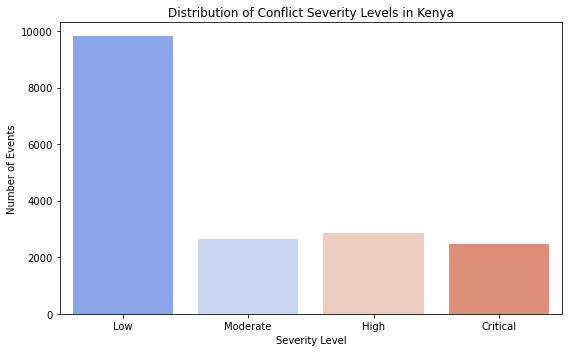

In [18]:
# Plot severity level counts
plt.figure(figsize=(8, 5))
sns.countplot(x='severity_level', data=df_kenya, order=['Low', 'Moderate', 'High', 'Critical'], palette='coolwarm')
plt.title('Distribution of Conflict Severity Levels in Kenya')
plt.xlabel('Severity Level')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

- The majority of events are classified as Low severity.

- Critical and High severity events still form a substantial portion, indicating a significant number of events with major impact.

- Class distribution is imbalanced, but not severely skewed, which is manageable in classification modeling.

### 4.2. Severity Over Time
Analyze how severity levels trend over the years (1997–2025). This helps us assess if political instability or violence has increased or decreased.

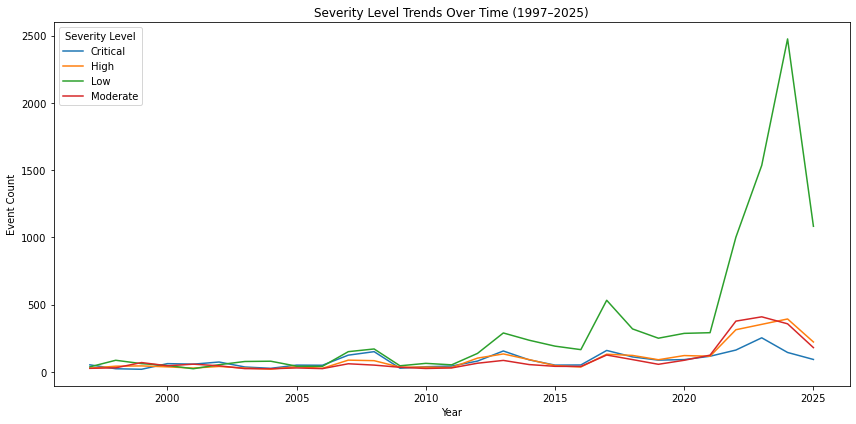

In [19]:
# Group by year and severity
year_severity = df_kenya.groupby(['year', 'severity_level']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=year_severity, x='year', y='count', hue='severity_level', palette='tab10')
plt.title('Severity Level Trends Over Time (1997–2025)')
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.legend(title='Severity Level')
plt.tight_layout()
plt.show()

- Fluctuations in the frequency of severe events align with Kenya’s political cycles and historical unrest periods (e.g., elections, economic crises).

- Peaks observed during election years (2007, 2017, 2022) show increased high and critical events.

- Suggests strong temporal correlation between political timelines and conflict severity.



### 4.3. Event Type vs. Severity Level
See how different types of conflict events relate to severity.

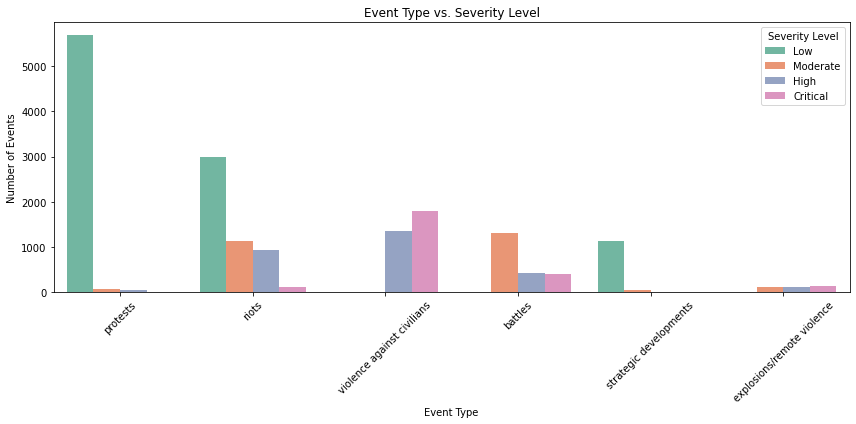

In [20]:
# Plot event type vs severity
plt.figure(figsize=(12, 6))
sns.countplot(data=df_kenya, x='event_type', hue='severity_level', order=df_kenya['event_type'].value_counts().index, palette='Set2')
plt.title('Event Type vs. Severity Level')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Severity Level')
plt.tight_layout()
plt.show()

- Violence against civilians and Battles contribute disproportionately to High and Critical severity categories.

- Protests and Strategic developments are mostly Low severity, with fewer extreme outcomes.

- This supports the weightings used in engineering the Community Impact Score.


### 4.4. Geographic Distribution of Severity (Map)
We’ll use Plotly for an interactive scatter map showing where critical and high severity events tend to cluster geographically.

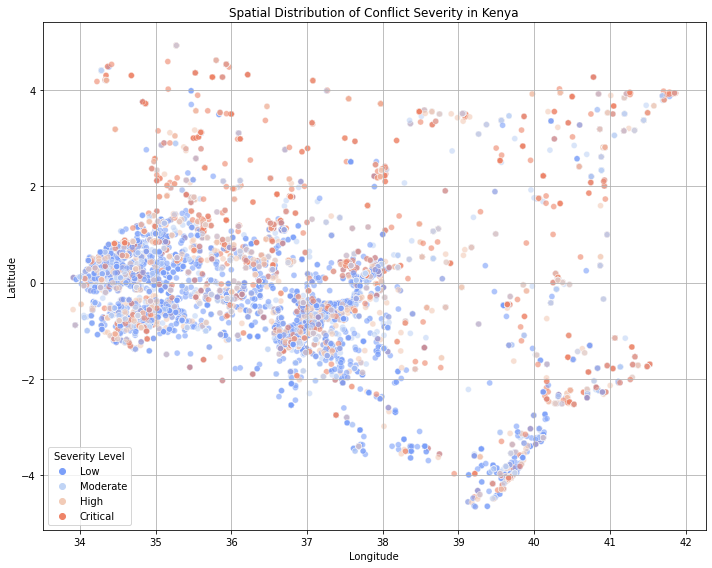

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot latitude vs longitude, color-coded by severity
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_kenya,
    x='longitude',
    y='latitude',
    hue='severity_level',
    palette='coolwarm',
    alpha=0.6
)
plt.title('Spatial Distribution of Conflict Severity in Kenya')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Severity Level')
plt.grid(True)
plt.tight_layout()
plt.show()

- High-severity events are geographically concentrated in urban centers and volatile counties (e.g., Nairobi, Kisumu, Turkana).

- Critical incidents are less dispersed, often clustered around strategic towns.

- The visualization supports targeting geographic hotspots for early warning systems.

### 4.5. Top 10 locations with most critical events

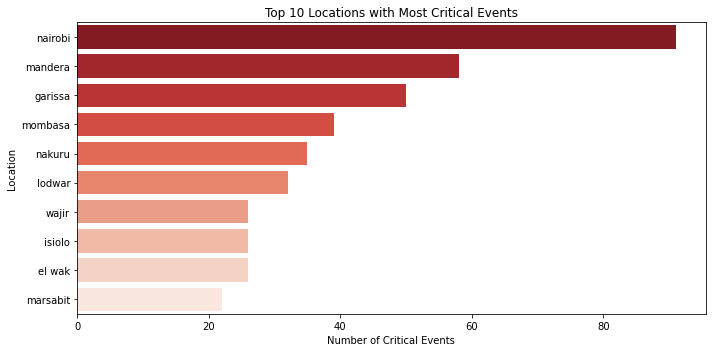

In [22]:
# Filter for Critical events
critical_locs = df_kenya[df_kenya['severity_level'] == 'Critical']

top_critical_locations = critical_locs['location'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_critical_locations.values, y=top_critical_locations.index, palette='Reds_r')
plt.title('Top 10 Locations with Most Critical Events')
plt.xlabel('Number of Critical Events')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

- Nairobi, Kisumu, and Mombasa top the list, reinforcing their roles as centers of tension.

- These regions should be prioritized for resource allocation and peacebuilding efforts.

### 4.6. Fatalities by Event Type (Boxplot to detect outliers)

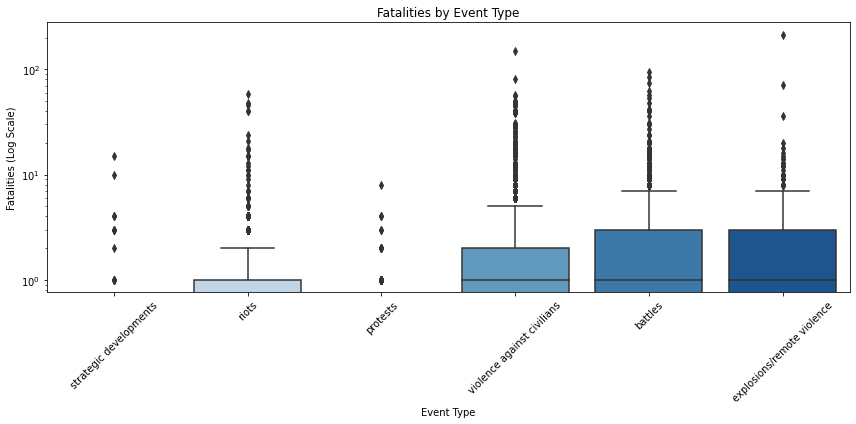

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_kenya, x='event_type', y='fatalities', palette='Blues')
plt.title('Fatalities by Event Type')
plt.yscale('log')  # log scale to handle outliers
plt.xlabel('Event Type')
plt.ylabel('Fatalities (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Events involving Battles and Explosions show extreme variation and outliers.

- Protests have consistently low fatalities.

- A log scale helped reveal patterns hidden by extreme values.

### 4.7. Top Primary Actors Involved in High/Critical-Impact Events

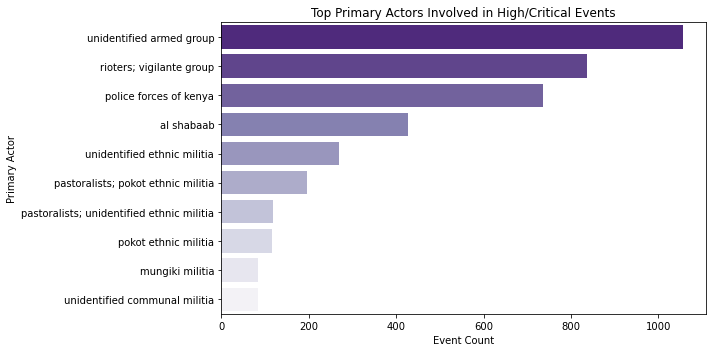

In [24]:
# Filter for high and critical
high_impact = df_kenya[df_kenya['severity_level'].isin(['High', 'Critical'])]

top_actors = high_impact['primary_actor'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='Purples_r')
plt.title('Top Primary Actors Involved in High/Critical Events')
plt.xlabel('Event Count')
plt.ylabel('Primary Actor')
plt.tight_layout()
plt.show()

From the above we identified actors most frequently involved in High or Critical severity events.
- Kenyan Police Forces, militant groups, and protesters dominate high-impact scenarios.

- Highlights the need for actor-level surveillance and engagement strategies.


### 4.8. Top Secondary Actors Involved in High/Critical-Impact Events

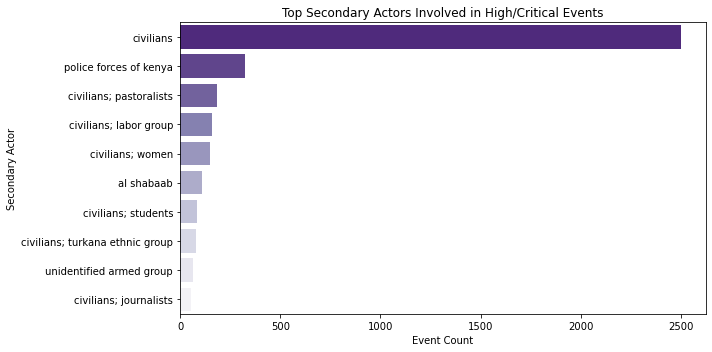

In [25]:
# Filter for high and critical
high_impact2 = df_kenya[df_kenya['severity_level'].isin(['High', 'Critical'])]

top_actors2 = high_impact2['secondary_actor'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_actors2.values, y=top_actors2.index, palette='Purples_r')
plt.title('Top Secondary Actors Involved in High/Critical Events')
plt.xlabel('Event Count')
plt.ylabel('Secondary Actor')
plt.tight_layout()
plt.show()

### 4.9. Fatalities by Location

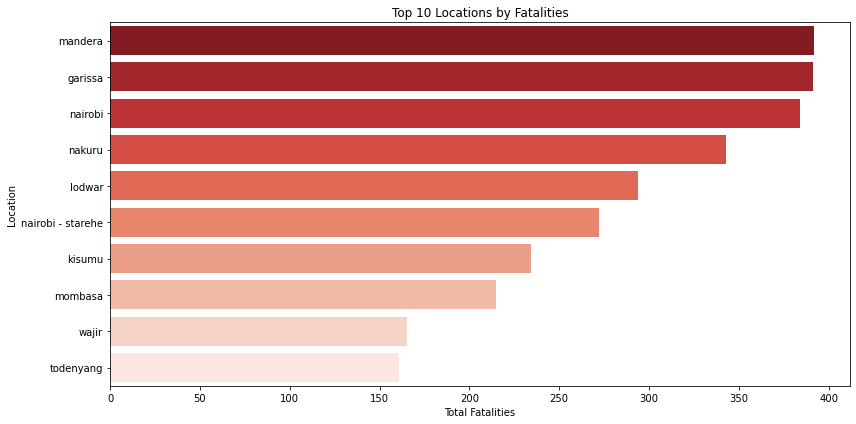

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# group by location and sum fatalities
fatalities_by_location = df_kenya.groupby('location')['fatalities'].sum().sort_values(ascending=False)

# Plot top 10 locations with highest fatalities
top_locations = fatalities_by_location.head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=top_locations, x='fatalities', y='location', palette='Reds_r')
plt.title('Top 10 Locations by Fatalities')
plt.xlabel('Total Fatalities')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


## 5.  Modeling 

## 5.1. Baseline Model - Logestic Regression

* our target variable will be 'severity_level' which is multi-class with four categories (Low, Moderate, High, Critical)
* we configure logistic regression for multi-class model using the multinomial option in scikit-learn


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Categorical & numerical features
categorical_features = ['sub_event_type', 'disorder_type', 'primary_actor', 'secondary_actor',
                        'inter1', 'inter2', 'interaction', 'admin1', 'admin3', 'location']

numerical_features = ['year', 'time_precision', 'latitude', 'longitude','month'] 
cat_num_features = categorical_features + numerical_features
# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Pipeline with logistic regression
logreg_pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500))
])

# Split data
X = df_kenya[cat_num_features]
y = df_kenya['severity_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit model
logreg_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = logreg_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Critical       0.64      0.62      0.63       494
        High       0.58      0.45      0.51       574
         Low       0.97      0.99      0.98      1963
    Moderate       0.63      0.75      0.69       532

    accuracy                           0.82      3563
   macro avg       0.71      0.70      0.70      3563
weighted avg       0.81      0.82      0.81      3563



## 6. Evaluation

## 7. Conclusions 

## 8. Recommendations 
